In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as md
import matplotlib.ticker as ticker

In [371]:
Dots = pd.read_csv('Data_Level4_UMDOTS_CampusTrafficCount.csv')

In [372]:
Dots

time  pedestrians  bicyclists  cars  buses  \
0      2019-10-28T00:00:00-04:00            0           0     0      0   
1      2019-10-28T00:15:00-04:00            0           0     0      0   
2      2019-10-28T00:30:00-04:00            0           0     0      0   
3      2019-10-28T00:45:00-04:00            0           0     0      0   
4      2019-10-28T01:00:00-04:00            0           0     0      0   
5      2019-10-28T01:15:00-04:00            0           0     0      0   
6      2019-10-28T01:30:00-04:00            0           0     1      0   
7      2019-10-28T01:45:00-04:00            0           0     0      0   
8      2019-10-28T02:00:00-04:00            0           0     1      0   
9      2019-10-28T02:15:00-04:00            0           0     0      0   
10     2019-10-28T02:30:00-04:00            0           0     0      0   
11     2019-10-28T02:45:00-04:00            0           0     1      0   
12     2019-10-28T03:00:00-04:00            0           0     0      0   
13     2019-10-28T03:15:00-04:00            0           0     0      0   
14     2019-10-28T03:30:00-04:00            0           0     0      0   
15     2019-10-28T03:45:00-04:00            0           0     0      0   
16     2019-10-28T04:00:00-04:00            0           0     0      0   
17     2019-10-28T04:15:00-04:00            0           0     0      0   
18     2019-10-28T04:30:00-04:00            0           0     0      0   
19     2019-10-28T04:45:00-04:00            0           0     0      0   
20     2019-10-28T05:00:00-04:00            0           0     0      0   
21     2019-10-28T05:15:00-04:00            0           0     1      0   
22     2019-10-28T05:30:00-04:00            2           3     1      0   
23     2019-10-28T05:45:00-04:00            0           0     0      0   
24     2019-10-28T06:00:00-04:00            0           0     4      0   
25     2019-10-28T06:15:00-04:00            0           0     0      0   
26     2019-10-28T06:30:00-04:00            0           0     2      0   
27     2019-10-28T06:45:00-04:00            2           0     2      0   
28     2019-10-28T07:00:00-04:00            1           1    15      1   
29     2019-10-28T07:15:00-04:00            1           0    75      4   
...                          ...          ...         ...   ...    ...   
13450  2019-11-10T17:30:00-04:00            2           0    78      0   
13451  2019-11-10T17:45:00-04:00           10           0   113      1   
13452  2019-11-10T18:00:00-04:00            8           0   231      0   
13453  2019-11-10T18:15:00-04:00            0           0   149      0   
13454  2019-11-10T18:30:00-04:00            0           0    86      0   
13455  2019-11-10T18:45:00-04:00            1           2    28      0   
13456  2019-11-10T19:00:00-04:00            0           1    23      0   
13457  2019-11-10T19:15:00-04:00            0           0    45      0   
13458  2019-11-10T19:30:00-04:00            0           0    16      0   
13459  2019-11-10T19:45:00-04:00            0           2     8      0   
13460  2019-11-10T20:00:00-04:00            0           0    12      0   
13461  2019-11-10T20:15:00-04:00            0           1    20      0   
13462  2019-11-10T20:30:00-04:00            0           1    12      0   
13463  2019-11-10T20:45:00-04:00            0           3    12      0   
13464  2019-11-10T21:00:00-04:00            0           0    17      0   
13465  2019-11-10T21:15:00-04:00            0           1    13      0   
13466  2019-11-10T21:30:00-04:00            0           1    19      0   
13467  2019-11-10T21:45:00-04:00            0           1     3      0   
13468  2019-11-10T22:00:00-04:00            0           1     5      0   
13469  2019-11-10T22:15:00-04:00            0           1     0      0   
13470  2019-11-10T22:30:00-04:00            0           0     8      0   
13471  2019-11-10T22:45:00-04:00            0           0     8      0   
13472  2019-11-10T23:00:00-04:00

![title](dots_sensor.jpg)

![title](map.jpg)

In [373]:
Dots['Date'] = Dots['time'].str[:10]
Dots['Date'] = pd.to_datetime(Dots['Date'])

In [374]:
Dots['StartTime'] = Dots['time'].str[11:19]
Dots['StartTime'] = pd.to_datetime(Dots['StartTime'])
Dots['StartTime'] = Dots['StartTime'].apply(lambda x: x.time())

In [375]:
Dots['time'] = pd.to_datetime(Dots['time'].str[:10]+' '+Dots['time'].str[11:19])

In [376]:
Dots['location'].value_counts()

Campus_Dr_At_Paint_Branch_Dr         1348
South_Gate_Northern_View             1348
Regents_Dr_&_Stadium_Dr_1            1348
Campus_Dr_&_Presidential_Ave         1348
University_Blvd_&_Paint_Branch_Dr    1348
Regents_Dr_&_Stadium_Dr_2            1348
Regents_Dr_&_Stadium_Dr_3            1348
Stadium_Dr_East_Of_Regents_Dr        1348
South_Gate_South_View                1348
Paint_Branch_Dr_At_Campus_Dr         1348
Name: location, dtype: int64

In [377]:
def loca_into_five(a):
    if 'Gate' in a:
        return "Baltimore Avenue & Regents Drive (South Gate)"
    elif ('Campus' in a) & ('Paint' in a):
        return "Campus Drive & Paint Branch Drive"
    elif ('Regents' in a) & ('Stadium' in a):
        return "Stadium Drive & Regents Drive"
    else:
        return a

In [378]:
Dots['location_5'] = Dots['location'].apply(loca_into_five)

In [379]:
Dots['weekday'] = Dots['Date'].apply(lambda x: x.weekday()+1)

In [380]:
Dots.sample(5)

time  pedestrians  bicyclists  cars  buses  trucks  \
11503 2019-11-04 11:45:00          652         130    73      6      12   
1209  2019-11-09 14:15:00            2           0   147      2       1   
10256 2019-11-05 13:00:00          369          21   742      9       8   
10916 2019-10-29 09:00:00          172          30   110      9      10   
11220 2019-11-01 13:00:00           67          23    96      7       9   

                            location       Date StartTime  \
11503  Stadium_Dr_East_Of_Regents_Dr 2019-11-04  11:45:00   
1209    Campus_Dr_&_Presidential_Ave 2019-11-09  14:15:00   
10256          South_Gate_South_View 2019-11-05  13:00:00   
10916  Stadium_Dr_East_Of_Regents_Dr 2019-10-29  09:00:00   
11220  Stadium_Dr_East_Of_Regents_Dr 2019-11-01  13:00:00   

                                          location_5  weekday  
11503                  Stadium Drive & Regents Drive        1  
1209                    Campus_Dr_&_Presidential_Ave        6  
10256  Baltimore Avenue & Regents Drive (South Gate)        2  
10916                  Stadium Drive & Regents Drive        2  
11220                  Stadium Drive & Regents Drive        5

In [381]:
Dots['location_5'].value_counts()

Stadium Drive & Regents Drive                    5392
Baltimore Avenue & Regents Drive (South Gate)    2696
Campus Drive & Paint Branch Drive                2696
Campus_Dr_&_Presidential_Ave                     1348
University_Blvd_&_Paint_Branch_Dr                1348
Name: location_5, dtype: int64

In [382]:
import os
if not os.path.exists("figs"):
    os.makedirs("figs")

<Figure size 576x2160 with 0 Axes>

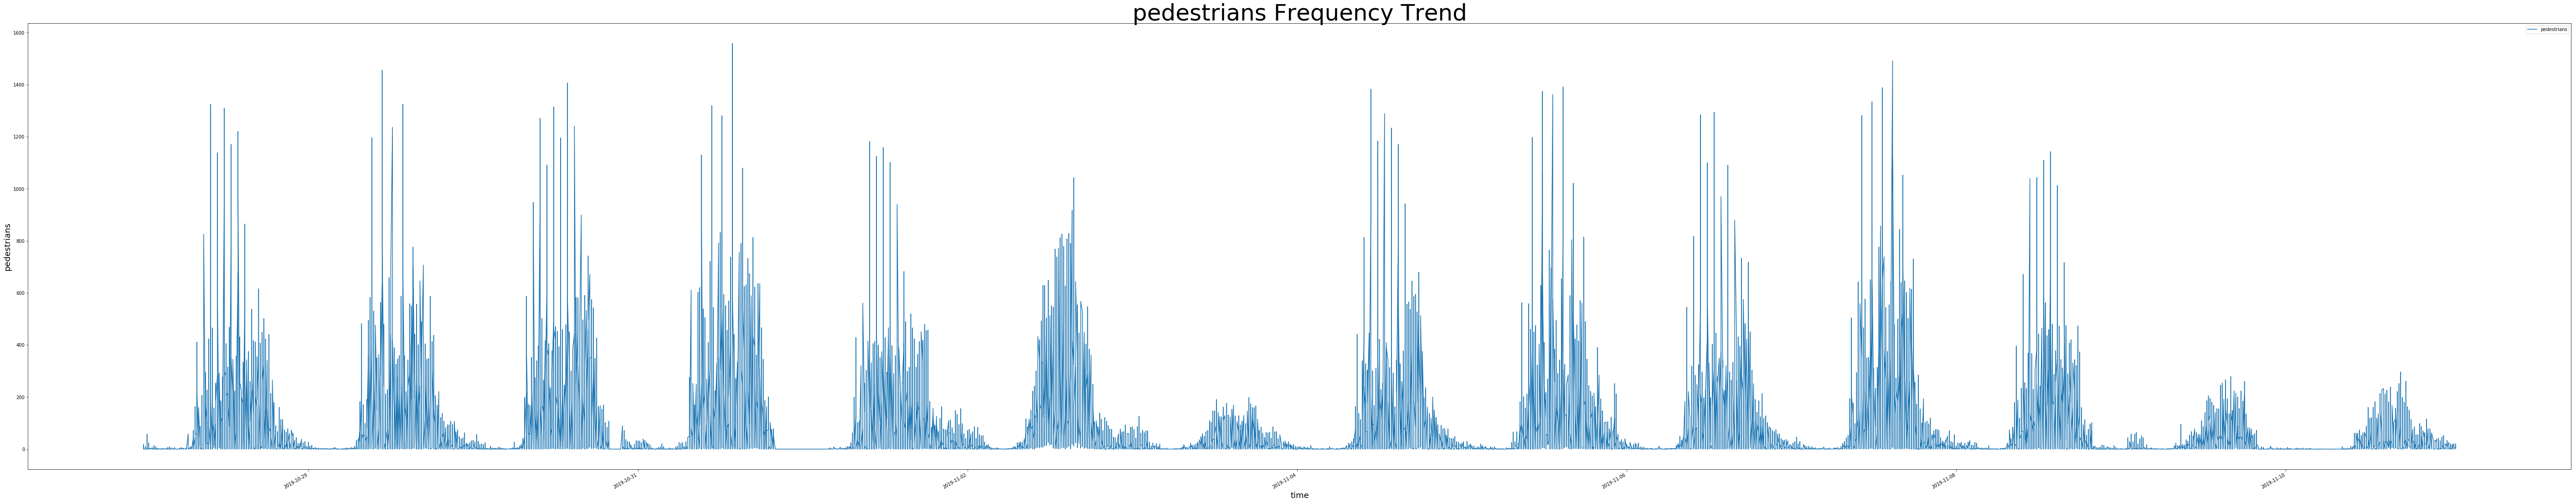

<Figure size 432x288 with 0 Axes>

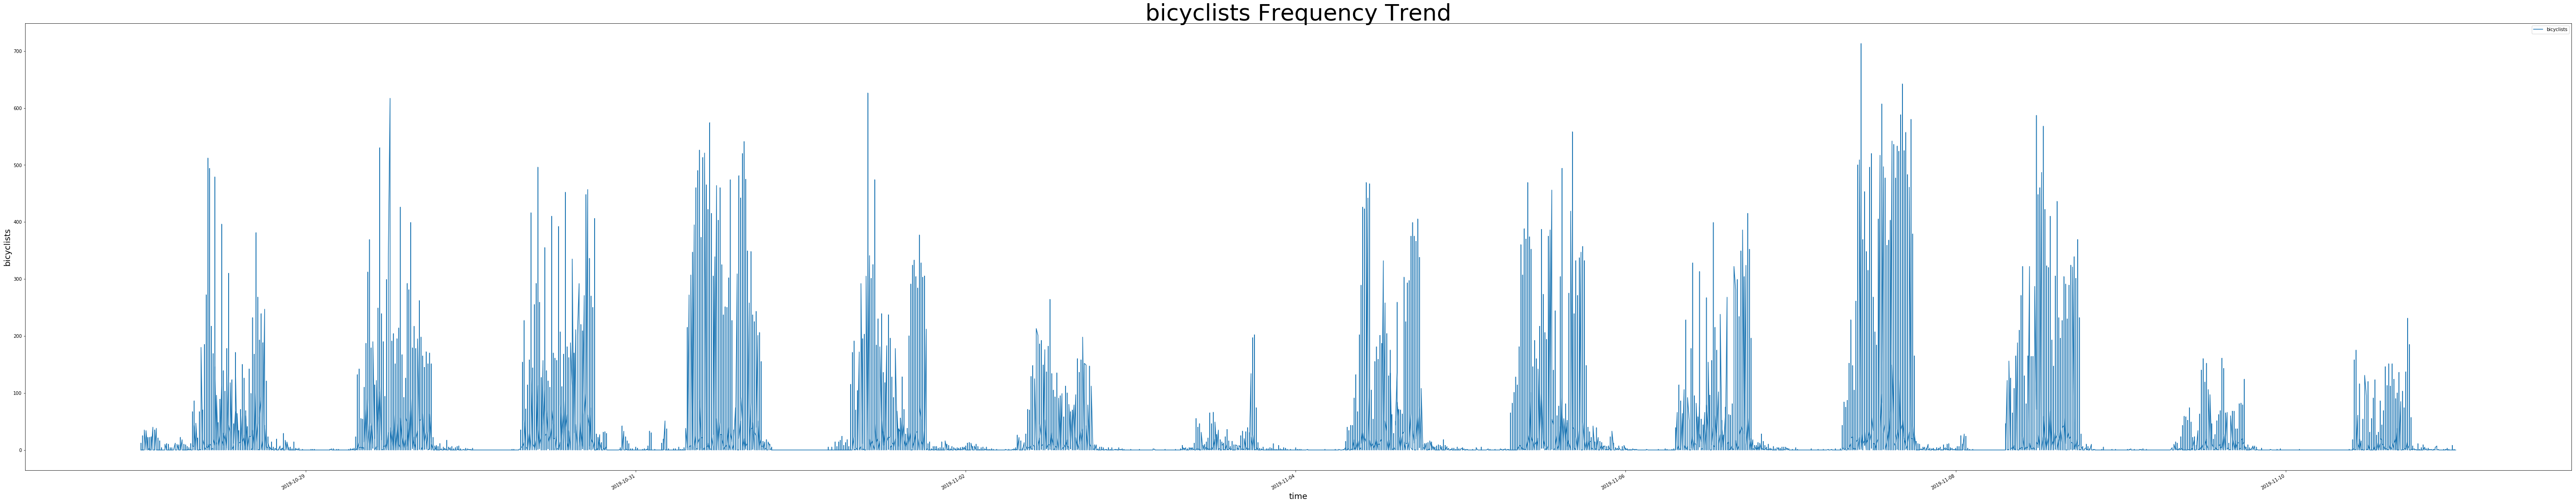

<Figure size 432x288 with 0 Axes>

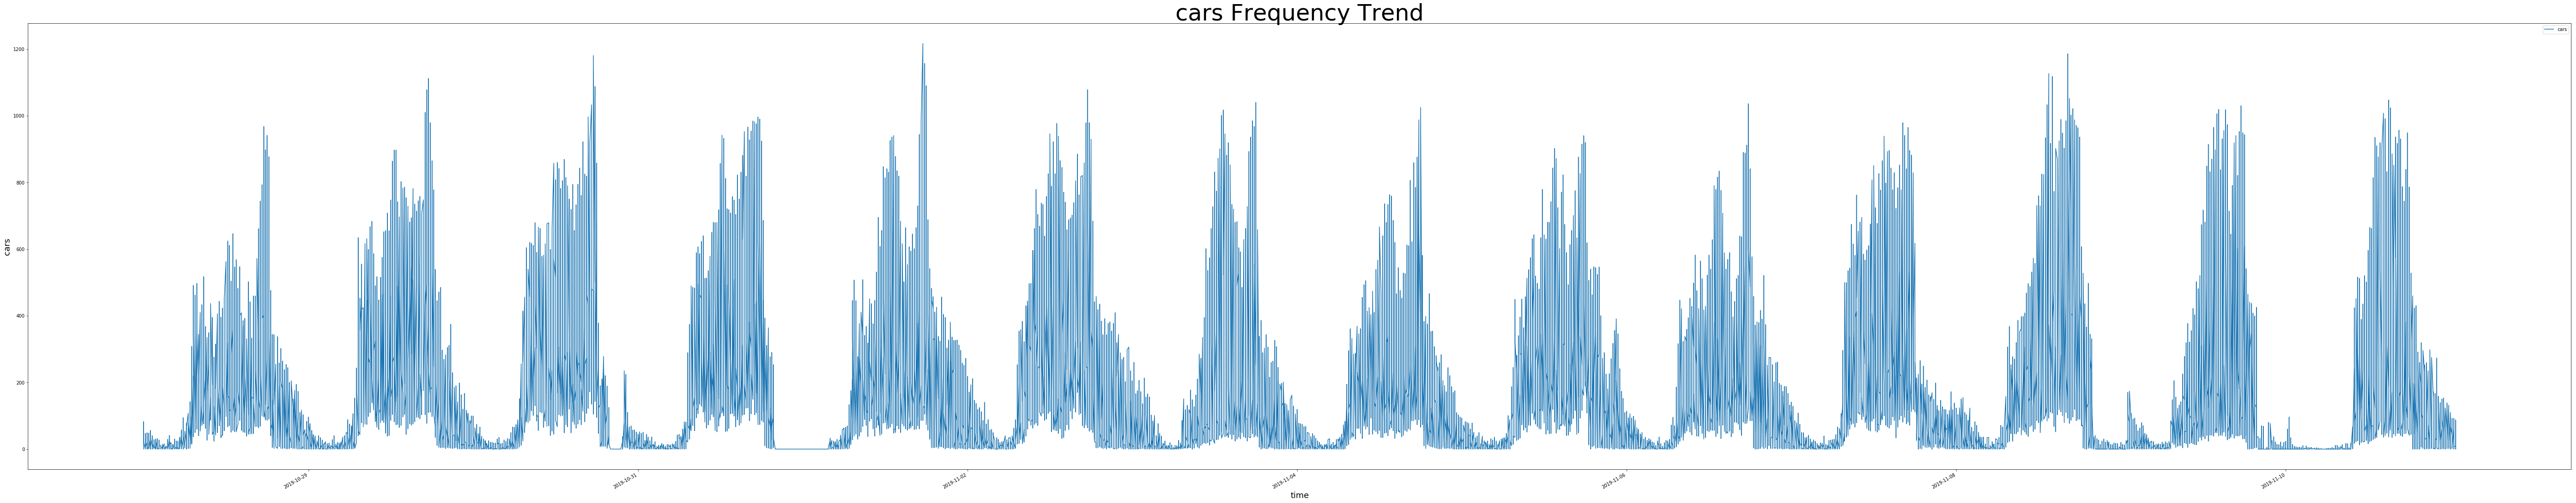

<Figure size 432x288 with 0 Axes>

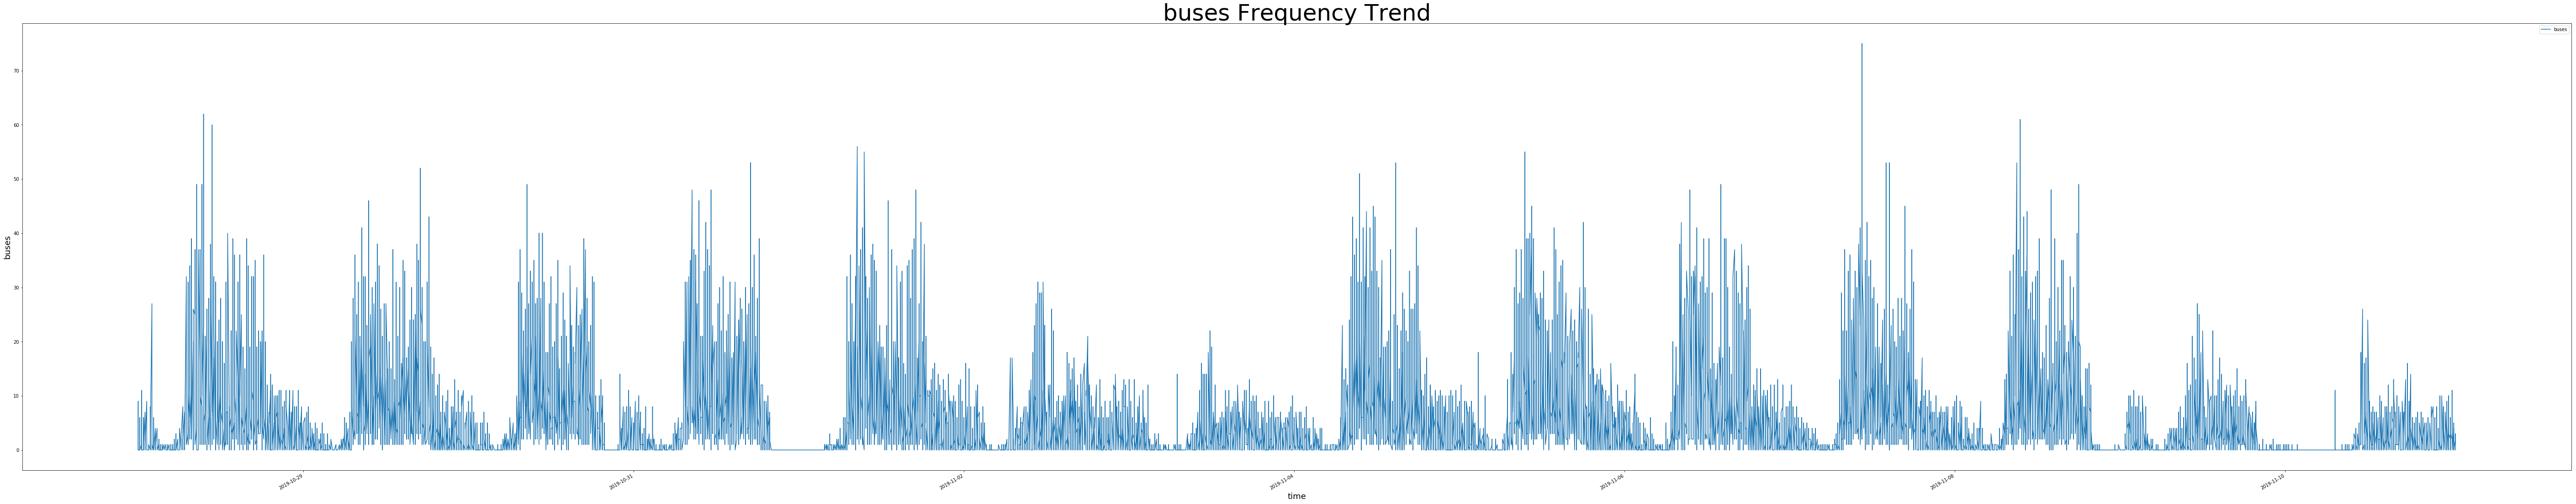

<Figure size 432x288 with 0 Axes>

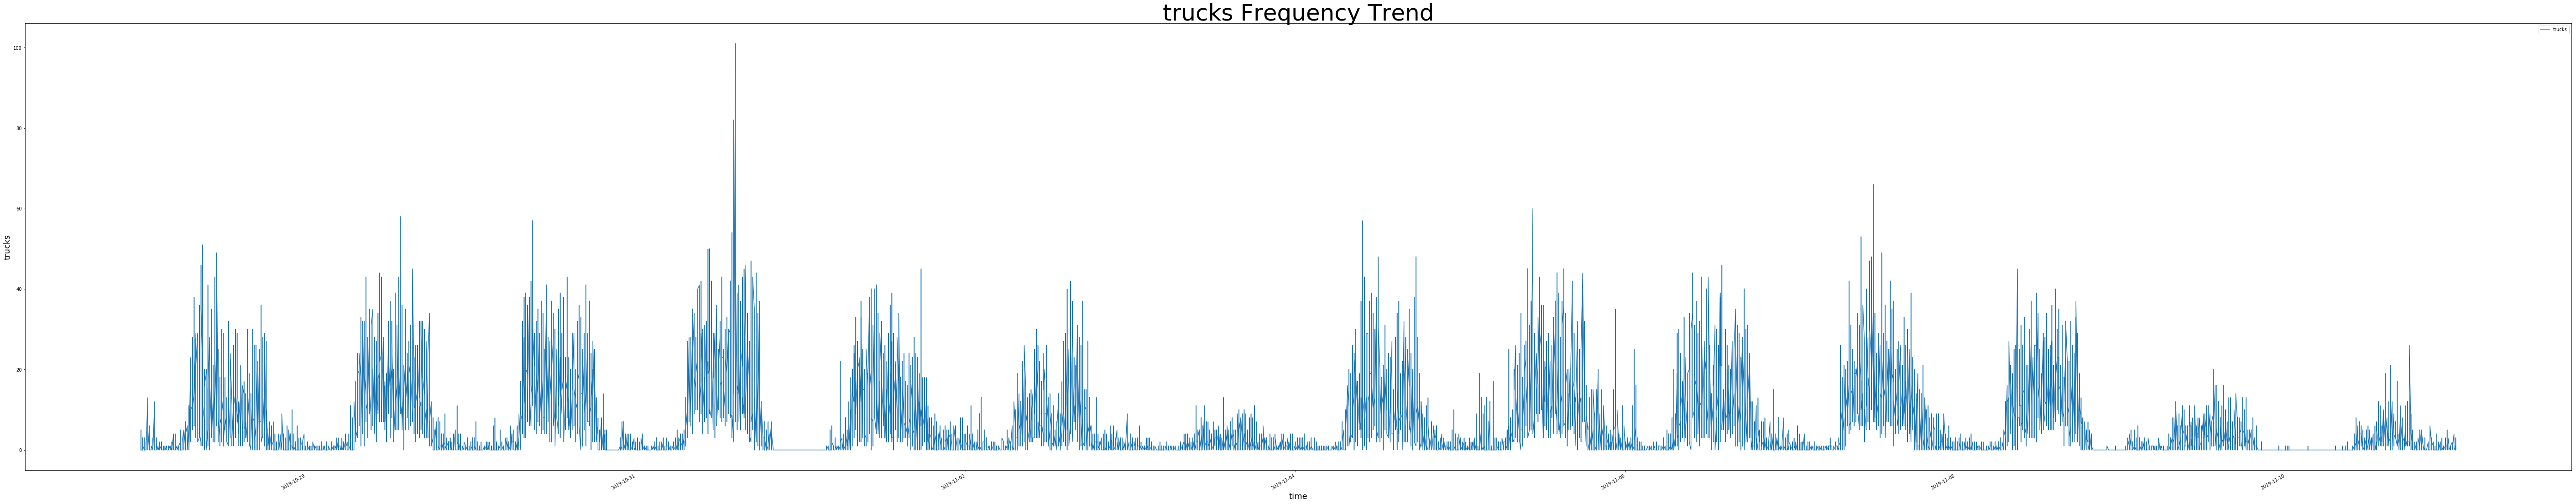

<Figure size 432x288 with 0 Axes>

In [383]:
plt.figure(figsize=(8,30))

for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    Dots.plot('time',types,figsize=(100,20))

    plt.xlabel('time', fontsize =18)
    plt.ylabel(types,fontsize =18)
    plt.title(types + ' Frequency Trend',fontsize =50, color = "k")
    plt.savefig("figs/" + types +".png",dpi=100) 
    plt.figure()
    
    plt.show()


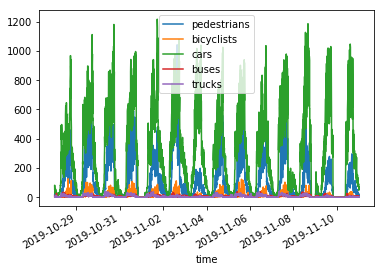

In [384]:
Dots[Dots['location_5']== "Baltimore Avenue & Regents Drive (South Gate)"].plot(kind = 'line', 
                                                                            y = ['pedestrians','bicyclists','cars','buses','trucks'],
                                                                           x = 'time')

## Investigate the influences of Weather

1. Load csv data, interprete the data, 
Temperature/wind vs Walk/Bike: Daily (Min temperature at 9)



In [385]:
weather_dot=pd.read_csv('Wunderground_Weather_NumbersOnly - Sheet1.csv')
weather_dot=weather_dot[['Day','Time','Temperature_F', 'Wind_Speed_MPH','Wind_Gust_MPH']]


In [391]:
weather_dot['hour']=weather_dot.Time.apply(lambda x:int(x.split(":", 1)[0]))
weather_dot['is_morning']=weather_dot['hour'].apply(lambda x: x<=9 and x>=5)
weater_dot_morning=weather_dot[weather_dot['is_morning']==True]
weater_dot_morning=weater_dot_morning[["Day","Temperature_F","Wind_Speed_MPH",'Wind_Gust_MPH']]
weater_dot_morning_ave=weater_dot_morning.groupby('Day').mean()


In [387]:
weater_dot_morning_ave

Temperature_F  Wind_Speed_MPH  Wind_Gust_MPH
Day                                                     
10/29/2019      57.500000        0.166667       0.000000
10/30/2019      59.000000        0.150000       0.000000
10/31/2019      66.944444        9.777778      12.500000
11/1/2019       42.611111        4.111111       5.166667
11/10/2019      41.333333        1.000000       0.000000
11/11/2019      47.222222        0.777778       0.000000
11/2/2019       37.555556        0.000000       0.000000
11/3/2019       38.888889        2.111111       1.555556
11/4/2019       42.166667        0.000000       0.000000
11/5/2019       44.166667        0.166667       0.000000
11/6/2019       42.333333        0.888889       0.000000
11/7/2019       49.941176        4.176471       0.000000
11/8/2019       36.611111        8.333333       8.222222
11/9/2019       31.200000        0.800000       0.000000

### Investigate the influence of temperature

### Merge sensor type

In [394]:
Dots_sensor_1=Dots[Dots['location_5']=='Campus Drive & Paint Branch Drive']
Dots_sensor_other=Dots[Dots['location_5']!='Campus Drive & Paint Branch Drive']
Dots_sensor_2=Dots[Dots['location_5']=='Stadium Drive & Regents Drive']
Dots_sensor_other=Dots_sensor_other[Dots_sensor_other['location_5']!='Stadium Drive & Regents Drive']
Dots_sensor_3=Dots[Dots['location_5']=='Baltimore Avenue & Regents Drive (South Gate)']
Dots_sensor_other=Dots_sensor_other[Dots_sensor_other['location_5']!='Baltimore Avenue & Regents Drive (South Gate)']

Dots_sensor_1=Dots_sensor_1.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_2=Dots_sensor_2.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_3=Dots_sensor_3.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_other=Dots_sensor_other.drop(columns=['location'])

#for i in ['pedestrians','bicyclists','cars','buses','trucks']:
#    Dots_sensor_2[i]=Dots_sensor_2[i]*2

Dots_mod=Dots_sensor_1.append([Dots_sensor_2,Dots_sensor_3,Dots_sensor_other],ignore_index=False)


Cold/Hot Date 2019-10-30 and 2019-11-06

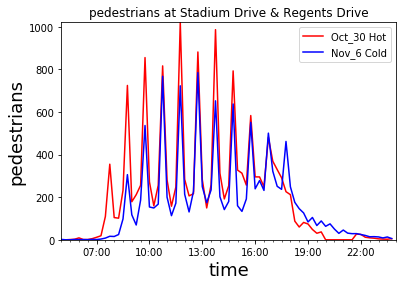

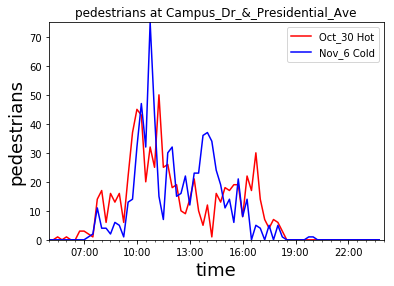

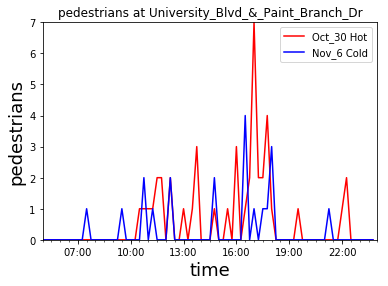

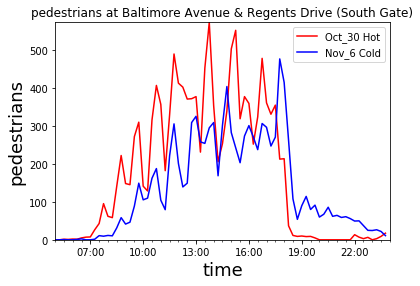

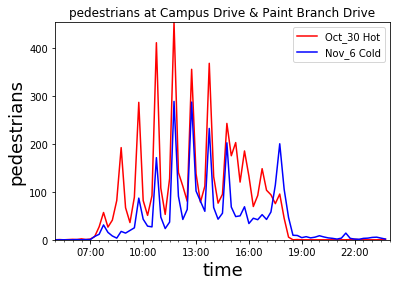

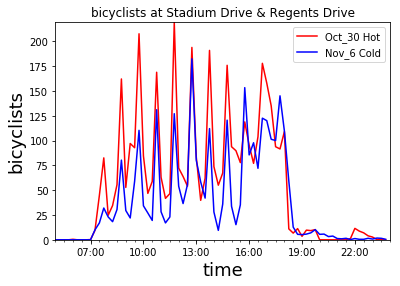

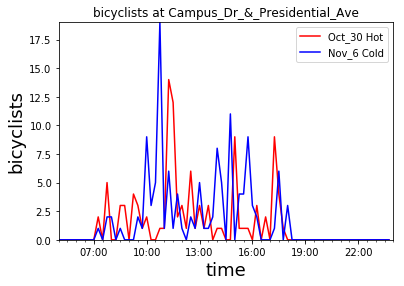

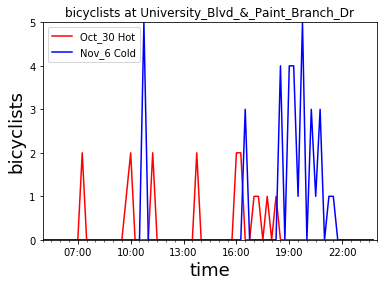

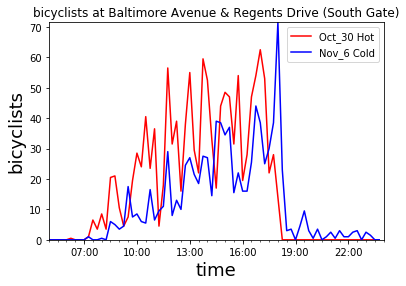

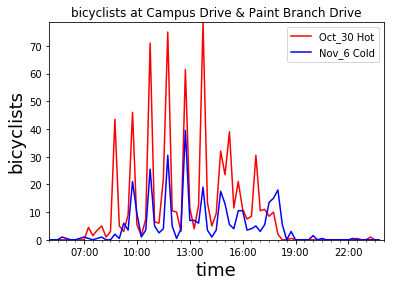

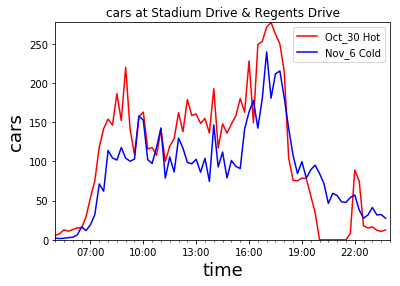

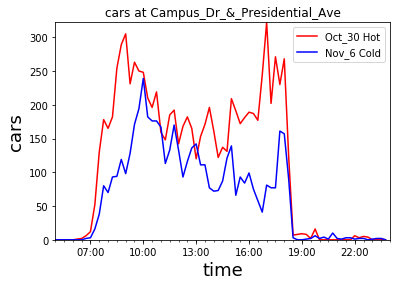

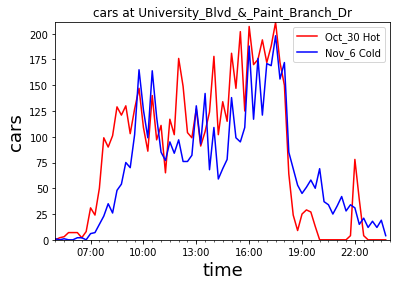

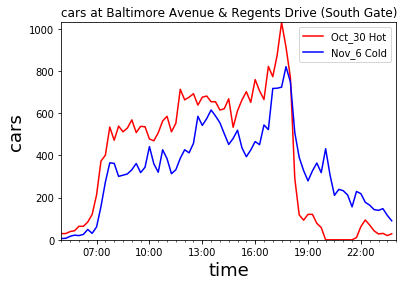

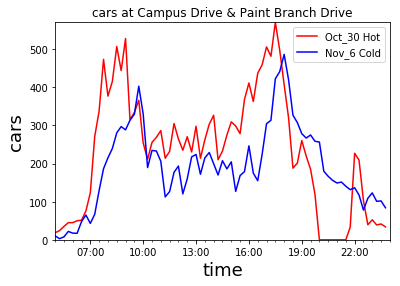

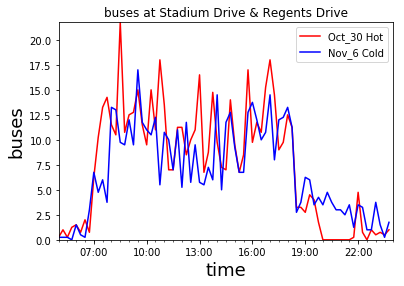

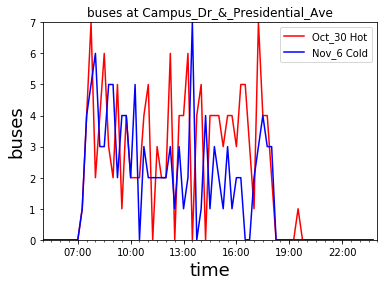

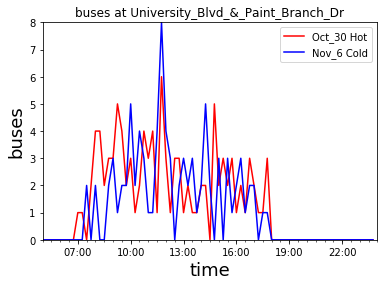

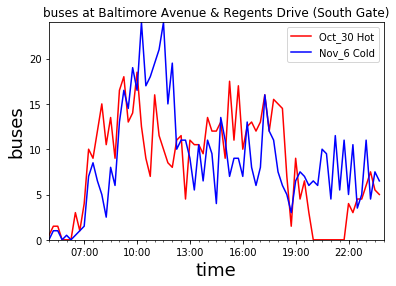

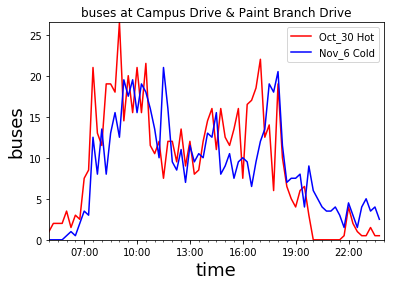

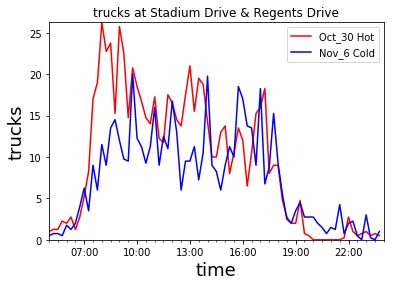

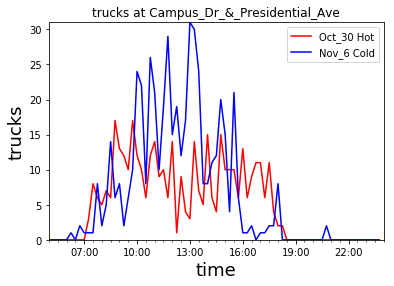

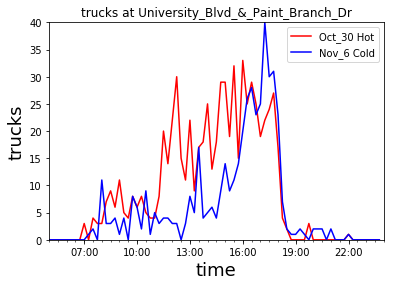

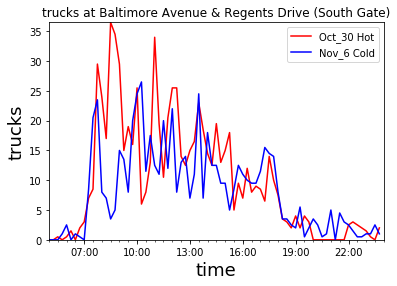

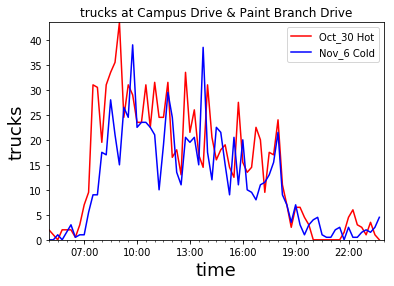

In [395]:
data_Nov_6=Dots_mod[Dots_mod['Date']=='2019-11-06']
data_Oct_30=Dots_mod[Dots_mod['Date']=='2019-10-30']

for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for locs in ['Stadium Drive & Regents Drive','Campus_Dr_&_Presidential_Ave','University_Blvd_&_Paint_Branch_Dr',
                 'Baltimore Avenue & Regents Drive (South Gate)','Campus Drive & Paint Branch Drive']:
        value1=data_Oct_30[data_Oct_30['location_5']==locs]
        value2=data_Nov_6[data_Nov_6['location_5']==locs]
        x=value1.time
        y1=value1[types]
        y2=value2[types]
        start_time=x.values[0]+np.timedelta64(5,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Oct_30 Hot',color='r')
        ax.plot(x, y2, label='Nov_6 Cold',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =18)
        plt.ylabel(types,fontsize =18)
        plt.title(types + ' at '+locs, color = "k")
        plt.margins(0)
    
        plt.show()

Cold/Hot Date 2019-11-01 and 2019-11-08

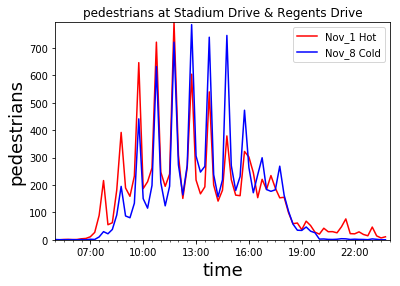

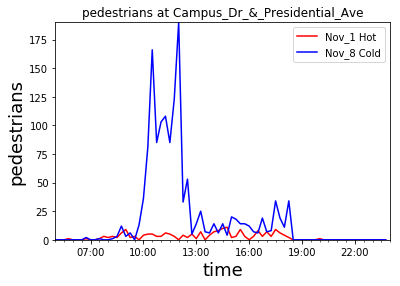

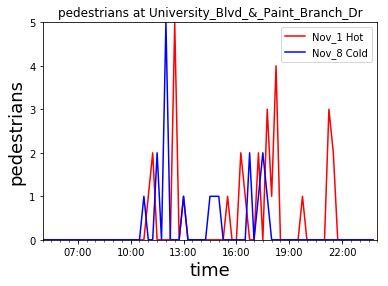

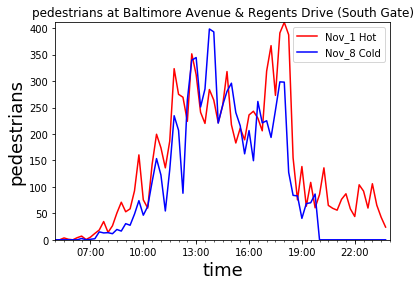

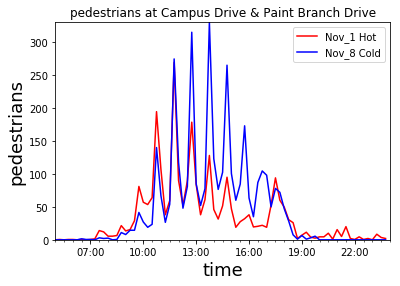

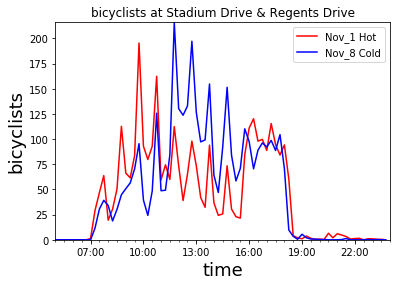

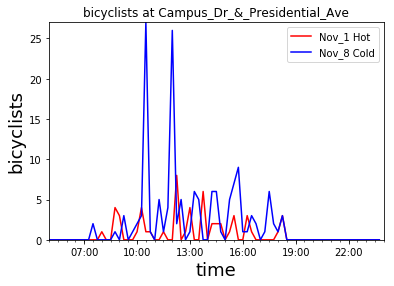

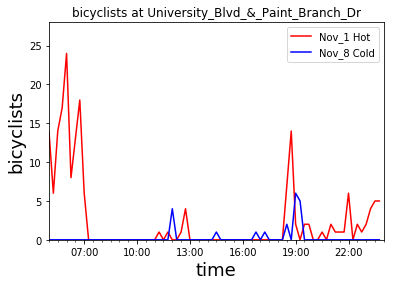

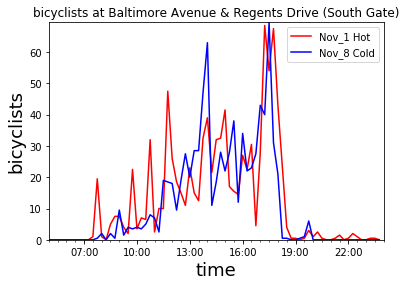

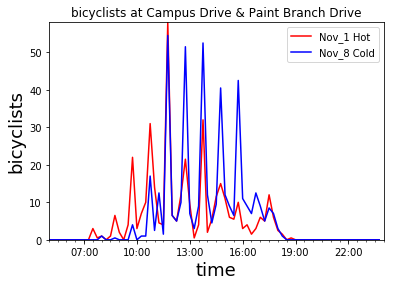

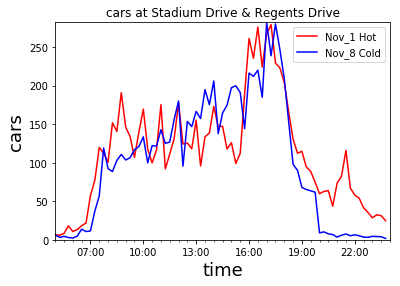

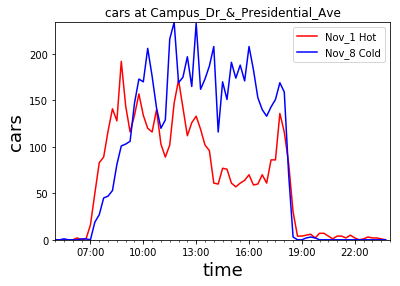

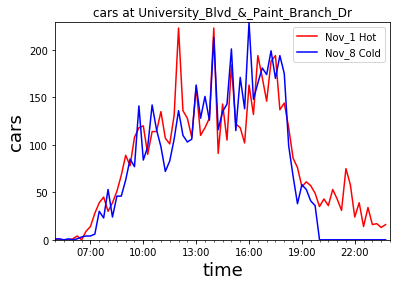

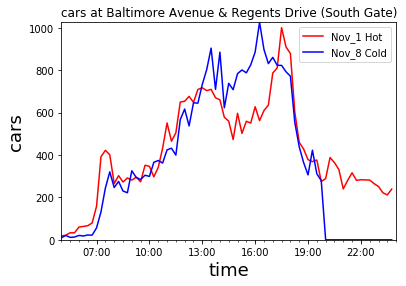

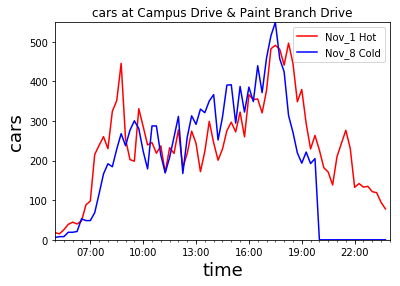

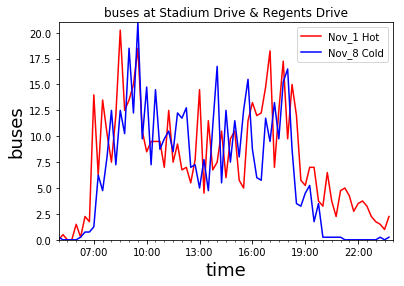

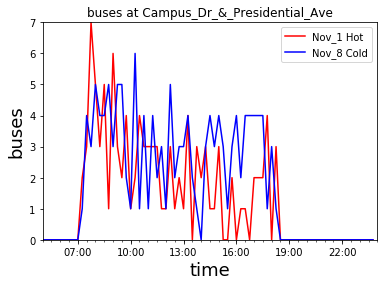

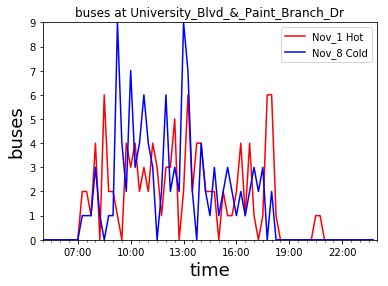

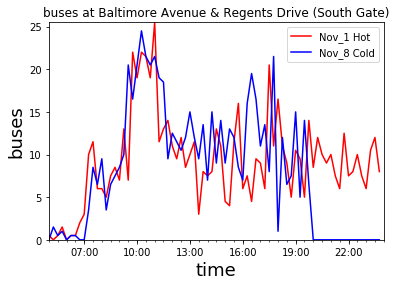

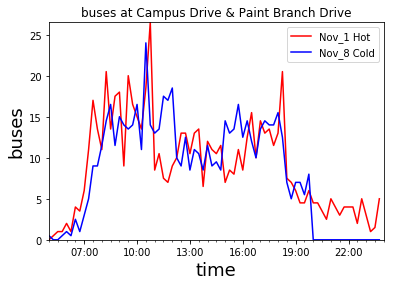

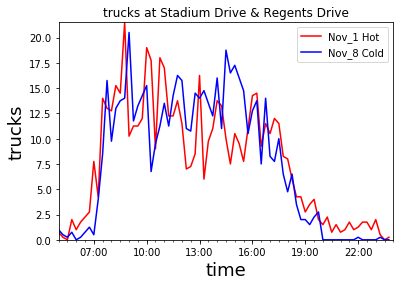

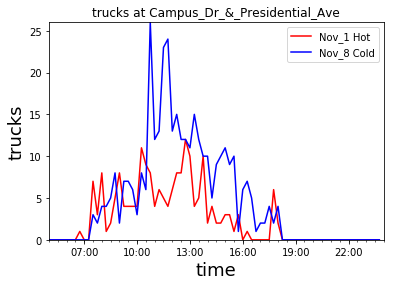

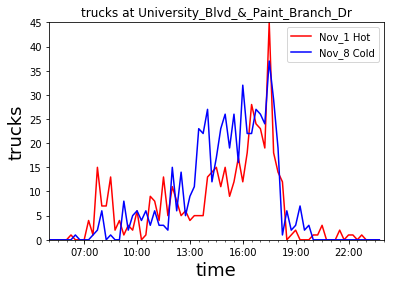

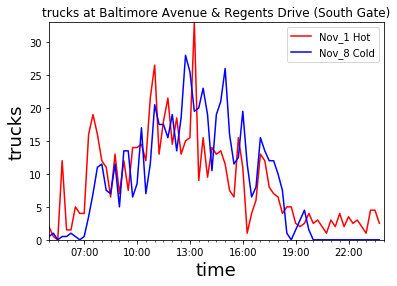

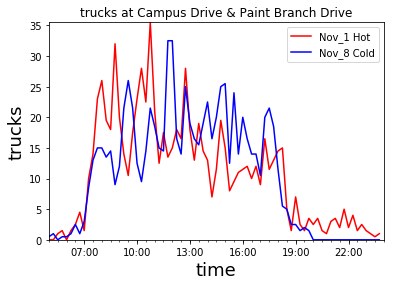

In [392]:
data_Nov_8=Dots_mod[Dots_mod['Date']=='2019-11-08']
data_Nov_1=Dots_mod[Dots_mod['Date']=='2019-11-01']

for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for locs in ['Stadium Drive & Regents Drive','Campus_Dr_&_Presidential_Ave','University_Blvd_&_Paint_Branch_Dr',
                 'Baltimore Avenue & Regents Drive (South Gate)','Campus Drive & Paint Branch Drive']:
        value1=data_Nov_1[data_Nov_1['location_5']==locs]
        value2=data_Nov_8[data_Nov_8['location_5']==locs]
        x=value1.time
        y1=value1[types]
        y2=value2[types]
        start_time=x.values[0]+np.timedelta64(5,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Nov_1 Hot',color='r')
        ax.plot(x, y2, label='Nov_8 Cold',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =18)
        plt.ylabel(types,fontsize =18)
        plt.title(types + ' at '+locs, color = "k")
        plt.margins(0)
    
        plt.show()

Wind Date 2019-10-30 and 2019-10-31

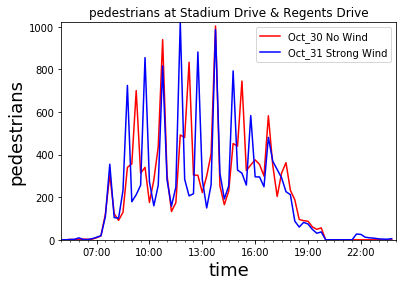

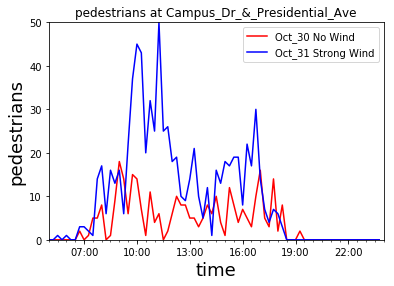

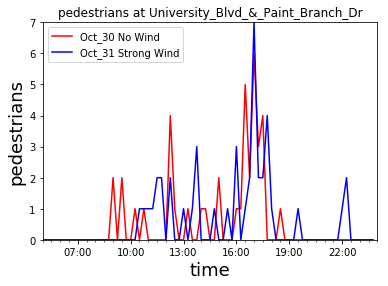

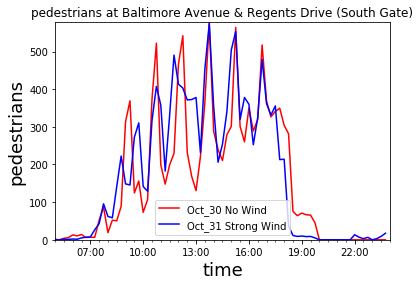

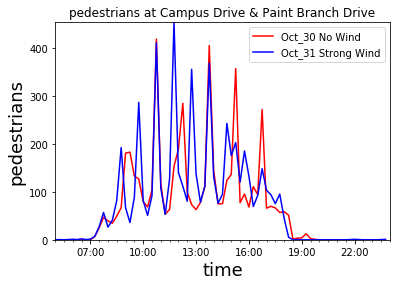

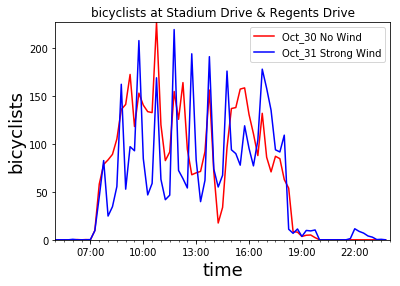

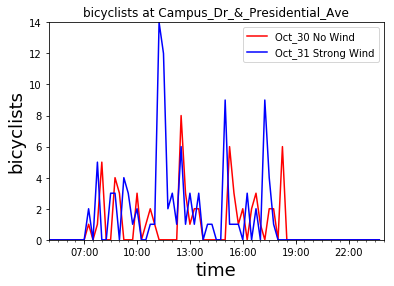

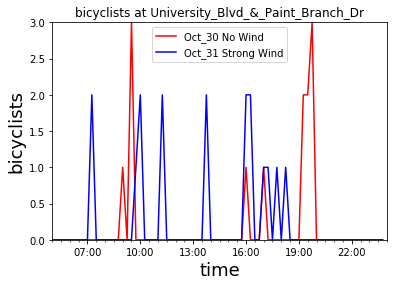

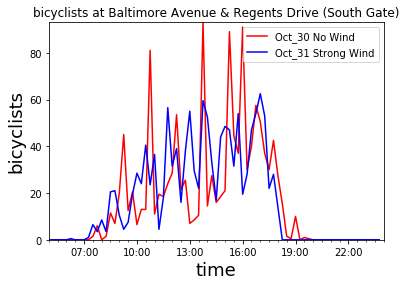

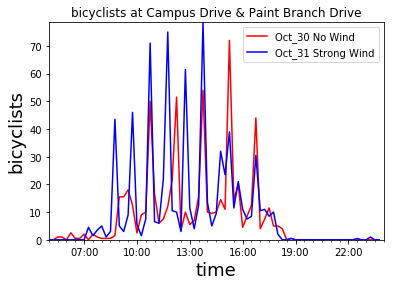

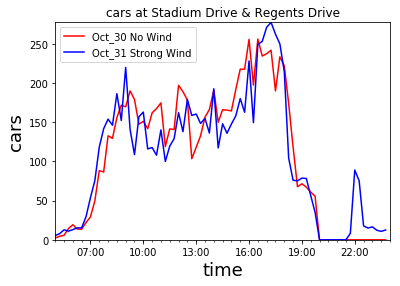

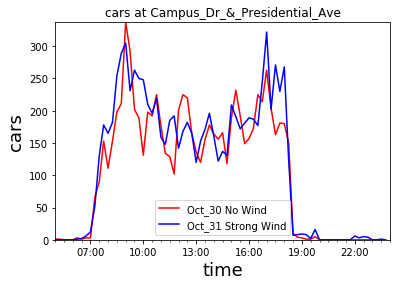

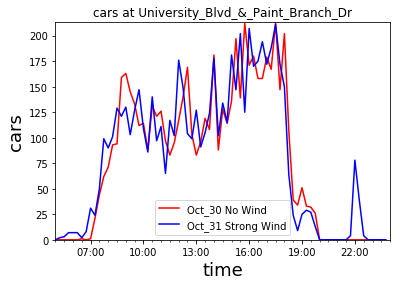

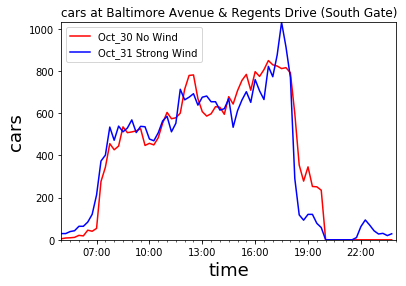

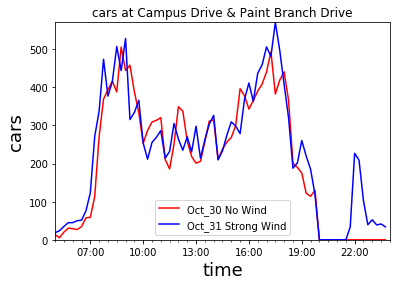

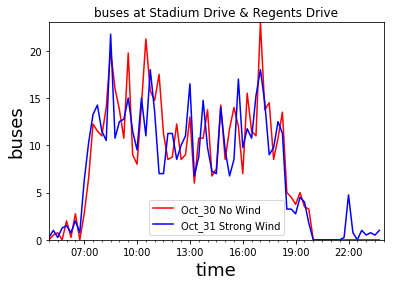

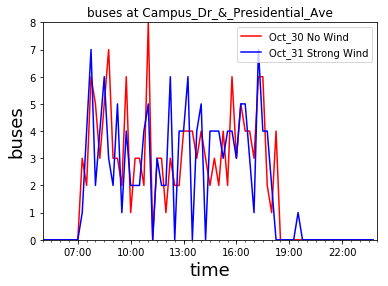

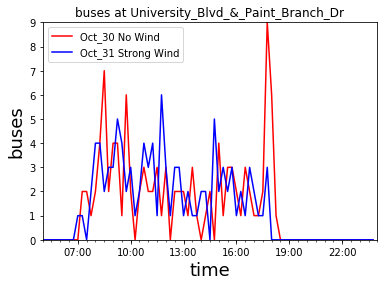

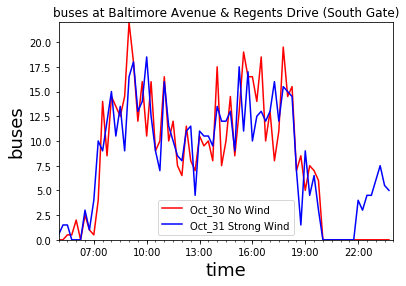

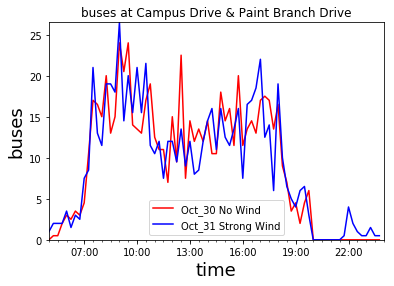

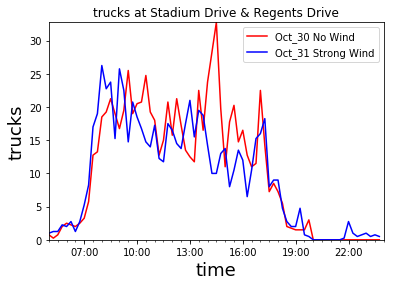

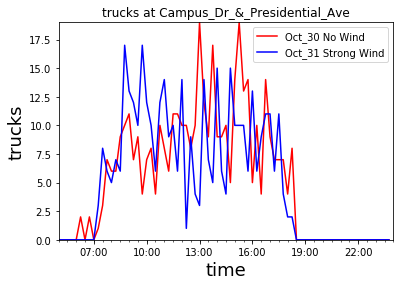

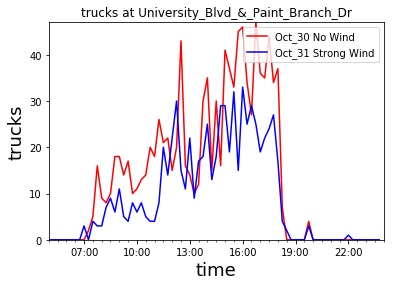

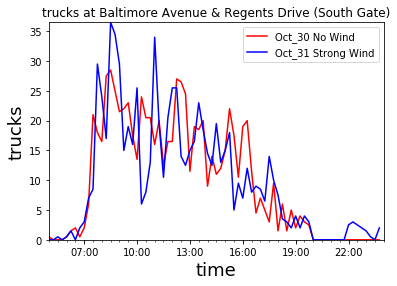

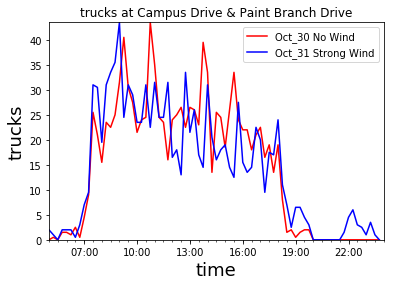

In [396]:
data_Oct_31=Dots_mod[Dots_mod['Date']=='2019-10-31']
data_Oct_30=Dots_mod[Dots_mod['Date']=='2019-10-30']

for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for locs in ['Stadium Drive & Regents Drive','Campus_Dr_&_Presidential_Ave','University_Blvd_&_Paint_Branch_Dr',
                 'Baltimore Avenue & Regents Drive (South Gate)','Campus Drive & Paint Branch Drive']:
        value1=data_Oct_31[data_Oct_31['location_5']==locs]
        value2=data_Oct_30[data_Oct_30['location_5']==locs]
        x=value1.time
        y1=value1[types]
        y2=value2[types]
        start_time=x.values[0]+np.timedelta64(5,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Oct_30 No Wind',color='r')
        ax.plot(x, y2, label='Oct_31 Strong Wind',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =18)
        plt.ylabel(types,fontsize =18)
        plt.title(types + ' at '+locs, color = "k")
        plt.margins(0)
    
        plt.show()